<a href="https://colab.research.google.com/github/EmilliAshleyMartinez/SIMULACION-1/blob/main/JUEGOCONMONEDAS_MARTINEZPEREA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TABLERO DE COLORES**

Elaboró: **MARTINEZ PEREA EMILLI ASHLEY**

Supongamos que tenemos un tablero con 4 sectores. Lanzamos 2 monedas y avanzamos en sentido horario el número de caras que aparezcan. Si repetimos el procedimiento... ¿Son todos los sectores igual de probables cuando pase mucho tiempo?

# Solución Analítica
Este juego representa el comportamiento de una variable aleatoria en un sistema cíclico con transiciones estocásticas basadas en resultados de monedas.

La matriz estacionaria describe esas transiciones, y el código simula la evolución de esa cadena de Markov paso a paso.

$$P = \begin{bmatrix}
\frac{1}{4} & \frac{1}{2} & 0 & \frac{1}{4}\\
0 & \frac{1}{4} & \frac{1}{4} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{4} & \frac{1}{4} & 0\\
\frac{1}{4} & 0 & \frac{1}{2} & \frac{1}{4}
\end{bmatrix}$$

Con muchos pasos, la probabilidad de estar en cualquier color converge a 0.25, lo cual se puede demostrar resolviendo el sistema

$$\pi P = \pi, \sum\pi_i = 1$$
con
$$\pi = [\pi_1, \pi_2, \pi_3, \pi_4]$$

Así, se obtiene la distribución estacionaria:

$$
\pi_1 = \pi_2 = \pi_3 = \pi_4 = \frac{1}{4}
$$




# Simulación

Definimos una función que simula el comportamiento del juego, la lógica del código consiste en el uso de un diccionario para almacenar cada sector asignandole un valor númerico a cada uno para que sea más fácil manejar los datos. Se registra la "posición actual" y al mismo tiempo se realiza el conteo de la cantidad de veces que cae en ese color, en registro guardamos las probabilidades de que caiga en cada sector tras n simulaciones.

Posteriormente el ciclo for, realiza las iteraciones que se verían al lanzar varias veces las monedas, y la forma en la que va a avanzar en el tablero.

In [20]:
import random
import matplotlib.pyplot as plt

Función que simula el juego **n** veces, retorna en ***conteo*** el número de veces que cayó en cada sector y en ***registro*** la probabilidad de caer en ese respectivo sector.

In [21]:
def simular_juego(n):
    #incialización de listas y diciionarios
    sectores = {0: 'Rojo', 1: 'Naranja', 2: 'Verde', 3: 'Azul'}
    colores = list(sectores.values())
    posicion = 0
    conteo = {color: 0 for color in colores}
    registro = {color: [] for color in colores}

    #simulación de juego
    for paso in range(1, n + 1):
        avance = random.randint(0, 1) + random.randint(0, 1)
        posicion = (posicion + avance) % 4
        color = sectores[posicion]
        conteo[color] += 1
    #guardar color de sector en registro
        for c in colores:
            registro[c].append(conteo[c] / paso)

    return conteo, registro

Ejecutamos la función y mostramos las probabilidades de cada color:

In [29]:
conteo, registro = simular_juego(1000)

print("Probabilidades finales:")
total = sum(conteo.values()) #total de los conteos para todos los colores
for color in conteo:
    prob = conteo[color] / total #teorema probabilidad total
    print(f"{color}: {prob:.4f}")

Probabilidades finales:
Rojo: 0.2580
Naranja: 0.2520
Verde: 0.2470
Azul: 0.2430


Graficamos la probabilidad de caer en cada sector para n simulaciones

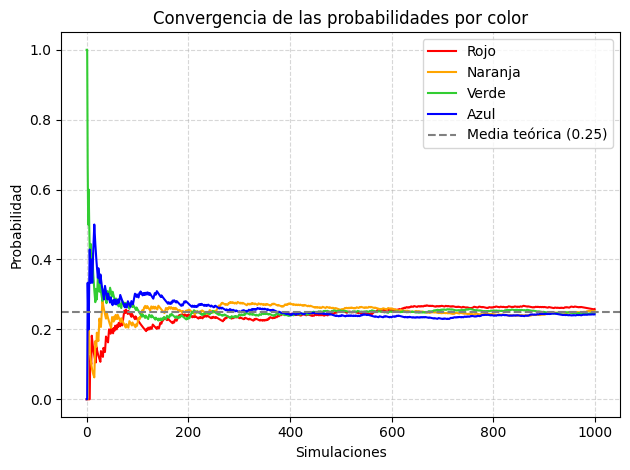

Por lo tanto, se concluye que todos los colores son igual de probables después de varias simulaciones del juego


In [32]:
coloresvisuales = {'Rojo': 'red', 'Naranja': 'orange', 'Verde': 'limegreen', 'Azul': 'blue'} #a los colores definidos le asignamos su sintaxis en pyhton

for color in registro:
  plt.plot(registro[color], label=color, color=coloresvisuales[color]) #ciclo para graficar todos los datos alamacenados en registro

plt.axhline(0.25, color='gray', linestyle='--', label='Media teórica (0.25)')
plt.title("Convergencia de las probabilidades por color")
plt.xlabel("Simulaciones")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("Por lo tanto, se concluye que todos los colores son igual de probables después de varias simulaciones del juego.")